In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplot
import seaborn as sns
import scipy.stats


In [3]:
ratings_url='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/teachingratings.csv'
ratings_df=pd.read_csv(ratings_url)
    

In [4]:
ratings_df.head()

,minority,age,gender,credits,beauty,eval,division,native,tenure,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof
0,yes,36,female,more,0.289916,4.3,upper,yes,yes,24,43,1,0,1,1,0,1,1,1
1,yes,36,female,more,0.289916,3.7,upper,yes,yes,86,125,1,0,1,1,0,1,1,1
2,yes,36,female,more,0.289916,3.6,upper,yes,yes,76,125,1,0,1,1,0,1,1,1
3,yes,36,female,more,0.289916,4.4,upper,yes,yes,77,123,1,1,1,1,0,1,1,1
4,no,59,male,more,-0.737732,4.5,upper,yes,yes,17,20,2,0,0,0,0,1,1,1


In [5]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 19 columns):
minority           463 non-null object
age                463 non-null int64
gender             463 non-null object
credits            463 non-null object
beauty             463 non-null float64
eval               463 non-null float64
division           463 non-null object
native             463 non-null object
tenure             463 non-null object
students           463 non-null int64
allstudents        463 non-null int64
prof               463 non-null int64
PrimaryLast        463 non-null int64
vismin             463 non-null int64
female             463 non-null int64
single_credit      463 non-null int64
upper_division     463 non-null int64
English_speaker    463 non-null int64
tenured_prof       463 non-null int64
dtypes: float64(2), int64(11), object(6)
memory usage: 68.8+ KB


In [6]:
ratings_df.shape

(463, 19)

In [299]:
ratings_df.describe()

,age,beauty,eval,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof
count,463.000000,4.630000e+02,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000
mean,48.365011,6.271140e-08,3.998272,36.624190,55.177106,45.434125,0.203024,0.138229,0.421166,0.058315,0.660907,0.939525,0.779698
std,9.802742,7.886477e-01,0.554866,45.018481,75.072800,27.508902,0.402685,0.345513,0.494280,0.234592,0.473913,0.238623,0.414899
min,29.000000,-1.450494e+00,2.100000,5.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,-6.562689e-01,3.600000,15.000000,19.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,48.000000,-6.801430e-02,4.000000,23.000000,29.000000,44.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,57.000000,5.456024e-01,4.400000,40.000000,60.000000,70.500000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,73.000000,1.970023e+00,5.000000,380.000000,581.000000,94.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [300]:
ratings_df['students'].mean()

36.62419006479482

In [10]:
ratings_df['students'].std()

45.018481271567005

In [12]:
ratings_df['students'].median()

23.0

In [13]:
ratings_df['students'].min()

5

In [14]:
ratings_df['students'].max()

380

In [224]:
ratings_df.head(2)

,minority,age,gender,credits,beauty,eval,division,native,tenure,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof
0,yes,36,female,more,0.289916,4.3,upper,yes,yes,24,43,1,0,1,1,0,1,1,1
1,yes,36,female,more,0.289916,3.7,upper,yes,yes,86,125,1,0,1,1,0,1,1,1


##### Create a histogram of the beauty variable and briefly comment on the distribution of data

(array([16., 51., 94., 66., 94., 42., 29., 40., 11., 20.]),
 array([-1.45049405, -1.10844234, -0.76639063, -0.42433892, -0.08228722,
         0.25976449,  0.6018162 ,  0.94386791,  1.28591962,  1.62797133,
         1.97002304]),
 <a list of 10 Patch objects>)

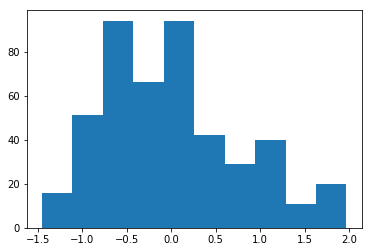

In [15]:
pyplot.hist(ratings_df['beauty'])

##### Does average beauty score differ by gender? Produce the means and standard deviations for both male and female instructors.

In [301]:
ratings_df.groupby('gender').agg({'beauty':['mean','std','var']}).reset_index()

gender    beauty                   
               mean      std       var
0  female  0.116109  0.81781  0.668813
1    male -0.084482  0.75713  0.573246

##### Calculate the percentage of males and females that are tenured professors. Will you say that tenure status differ by gender?

In [27]:
tenure_count=ratings_df.groupby('gender').agg({'tenure':'count'}).reset_index()
tenure_count['percentage']=100* tenure_count.tenure/tenure_count.tenure.sum()

In [28]:
tenure_count

,gender,tenure,percentage
0,female,195,42.116631
1,male,268,57.883369


##### Question 1: Calculate the percentage of visible minorities are tenure professors. Will you say that tenure status differed if teacher was a visible minority?

In [29]:
tenure_count=ratings_df.groupby('minority').agg({'tenure':'count'}).reset_index()
tenure_count['percentage']=100*tenure_count.tenure/tenure_count.tenure.sum()

In [30]:
tenure_count

,minority,tenure,percentage
0,no,399,86.177106
1,yes,64,13.822894


##### Question 2: Does average age differ by tenure? Produce the means and standard deviations for both tenured and untenured professors.

In [31]:
ratings_df.groupby('tenure').agg({'age':['mean','std','var']}).reset_index()

tenure        age                       
               mean        std         var
0     no  50.186275   6.946372   48.252087
1    yes  47.850416  10.420056  108.577562

##### Question 3: Create a histogram for the age variable.

(array([41., 37., 58., 48., 75., 74., 53., 69.,  0.,  8.]),
 array([29. , 33.4, 37.8, 42.2, 46.6, 51. , 55.4, 59.8, 64.2, 68.6, 73. ]),
 <a list of 10 Patch objects>)

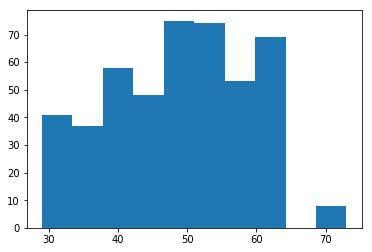

In [33]:
pyplot.hist(ratings_df['age'])

##### Question 4: What is the Median evaluation score for tenured Professors?

In [37]:
ratings_df[ratings_df['tenure']=='yes']['eval'].median()

4.0

In [51]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 19 columns):
minority           463 non-null object
age                463 non-null int64
gender             463 non-null object
credits            463 non-null object
beauty             463 non-null float64
eval               463 non-null float64
division           463 non-null object
native             463 non-null object
tenure             463 non-null object
students           463 non-null int64
allstudents        463 non-null int64
prof               463 non-null int64
PrimaryLast        463 non-null int64
vismin             463 non-null int64
female             463 non-null int64
single_credit      463 non-null int64
upper_division     463 non-null int64
English_speaker    463 non-null int64
tenured_prof       463 non-null int64
dtypes: float64(2), int64(11), object(6)
memory usage: 68.8+ KB


In [52]:
ratings_df.describe()

,age,beauty,eval,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof
count,463.000000,4.630000e+02,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000
mean,48.365011,6.271140e-08,3.998272,36.624190,55.177106,45.434125,0.203024,0.138229,0.421166,0.058315,0.660907,0.939525,0.779698
std,9.802742,7.886477e-01,0.554866,45.018481,75.072800,27.508902,0.402685,0.345513,0.494280,0.234592,0.473913,0.238623,0.414899
min,29.000000,-1.450494e+00,2.100000,5.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,-6.562689e-01,3.600000,15.000000,19.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,48.000000,-6.801430e-02,4.000000,23.000000,29.000000,44.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,57.000000,5.456024e-01,4.400000,40.000000,60.000000,70.500000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,73.000000,1.970023e+00,5.000000,380.000000,581.000000,94.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [54]:
ratings_df.shape

(463, 19)

In [58]:
ratings_df['students'].mean()

36.62419006479482

In [59]:
ratings_df['students'].median()

23.0

In [60]:
ratings_df['students'].min()

5

In [61]:
ratings_df['students'].max()

380

In [62]:
ratings_df.head()

,minority,age,gender,credits,beauty,eval,division,native,tenure,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof
0,yes,36,female,more,0.289916,4.3,upper,yes,yes,24,43,1,0,1,1,0,1,1,1
1,yes,36,female,more,0.289916,3.7,upper,yes,yes,86,125,1,0,1,1,0,1,1,1
2,yes,36,female,more,0.289916,3.6,upper,yes,yes,76,125,1,0,1,1,0,1,1,1
3,yes,36,female,more,0.289916,4.4,upper,yes,yes,77,123,1,1,1,1,0,1,1,1
4,no,59,male,more,-0.737732,4.5,upper,yes,yes,17,20,2,0,0,0,0,1,1,1


In [63]:
ratings_df.prof.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 53, 54, 55,
       56, 57, 58, 59, 60, 63, 64, 65, 66, 67, 68, 70, 71, 72, 73, 74, 75,
       76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92,
       93, 94, 22, 30, 40, 47, 61, 62, 69], dtype=int64)

In [65]:
ratings_df.prof.nunique()

94

In [66]:
no_duplicates=ratings_df.drop_duplicates(subset=['prof'])
no_duplicates.head()

,minority,age,gender,credits,beauty,eval,division,native,tenure,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof
0,yes,36,female,more,0.289916,4.3,upper,yes,yes,24,43,1,0,1,1,0,1,1,1
4,no,59,male,more,-0.737732,4.5,upper,yes,yes,17,20,2,0,0,0,0,1,1,1
7,no,51,male,more,-0.571984,3.7,upper,yes,yes,55,55,3,0,0,0,0,1,1,1
9,no,40,female,more,-0.677963,4.3,upper,yes,yes,40,46,4,0,0,1,0,1,1,1
17,no,31,female,more,1.509794,4.4,upper,yes,yes,42,48,5,0,0,1,0,1,1,1


In [67]:
no_duplicates['age'].mean()

47.5531914893617

In [68]:
no_duplicates['age'].std()

10.25651329515495

In [225]:
division_eval=ratings_df.groupby('division')[['eval']].mean().reset_index()

In [226]:
division_eval

,division,eval
0,lower,4.087261
1,upper,3.952614


In [247]:
div_eval=ratings_df.groupby('division').agg({'eval':['mean']}).reset_index()

In [248]:
div_eval

,division,eval
,,mean
0,lower,4.087261
1,upper,3.952614


##### Using a bar chart, demonstrate if instructors teaching lower-division courses receive higher average teaching evaluations.

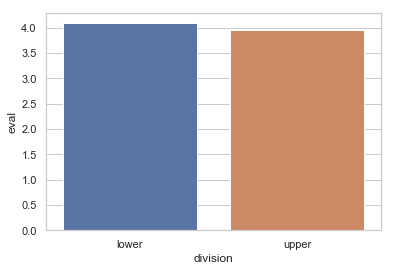

In [84]:
sns.set(style='whitegrid')
ax=sns.barplot(x='division',y='eval',data=division_eval)

##### Plot the relationship between age and teaching evaluation scores.

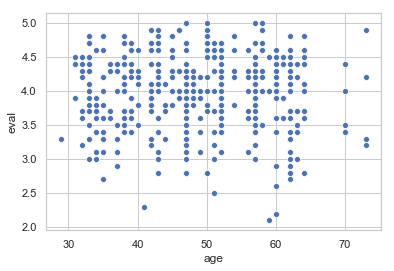

In [90]:
ax=sns.scatterplot(x='age',y='eval',data=ratings_df)

##### Using gender-differentiated scatter plots, plot the relationship between age and teaching evaluation scores.

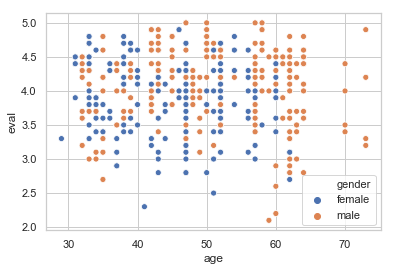

In [91]:
ax=sns.scatterplot(x='age',y='eval',hue='gender',data=ratings_df)

##### Create a box plot for beauty scores differentiated by credits.

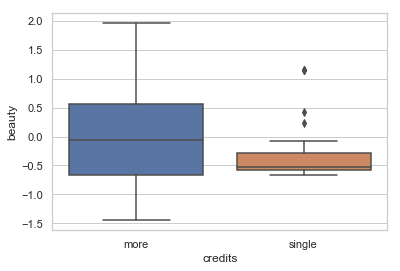

In [95]:

ax=sns.boxplot(x='credits',y='beauty',data=ratings_df)


##### What is the number of courses taught by gender?

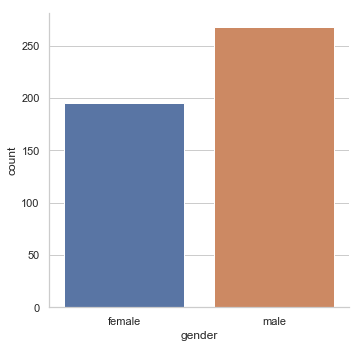

In [96]:
sns.catplot(x='gender',kind="count",data=ratings_df)

##### Create a group histogram of taught by gender and tenure

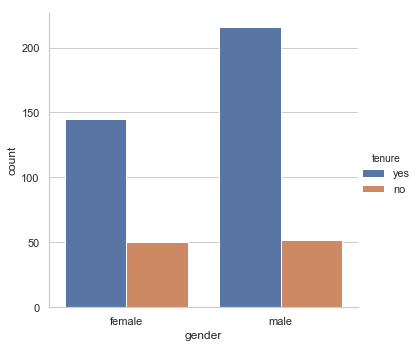

In [98]:
sns.catplot(x='gender',hue='tenure',kind="count",data=ratings_df)

##### Add division as another factor to the above histogram

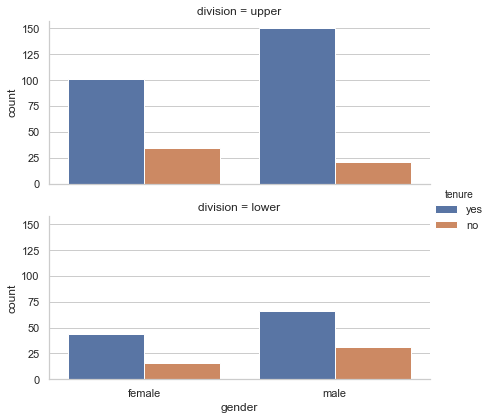

In [103]:
sns.catplot(x='gender',kind='count',hue='tenure',data=ratings_df,row='division',height=3,aspect=2)

##### Create a scatterplot of age and evaluation scores, differentiated by gender and tenure

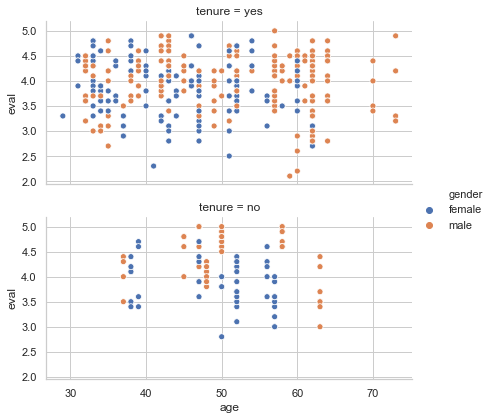

In [106]:
sns.relplot(x='age',y='eval',data=ratings_df,hue='gender',row='tenure',height=3,aspect=2)

##### Create a distribution plot of teaching evaluation scores

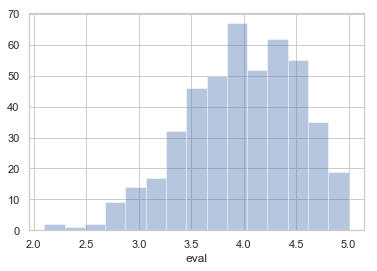

In [110]:
sns.distplot(ratings_df['eval'],kde=False)

##### Create a distribution plot of teaching evaluation score with gender as a factor

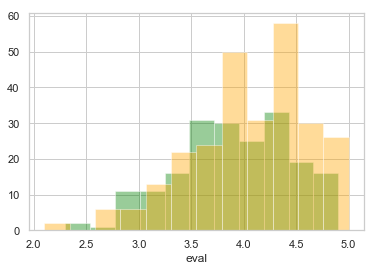

In [249]:
sns.distplot(ratings_df[ratings_df['gender']=='female']['eval'],color='green',kde=False)
sns.distplot(ratings_df[ratings_df['gender']=='male']['eval'],color='orange',kde=False)


##### Create a box plot - age of the instructor by gender

In [ ]:
sns.boxplot(x='gender',y='age',data=ratings_df)

##### Compare age along with tenure and gender

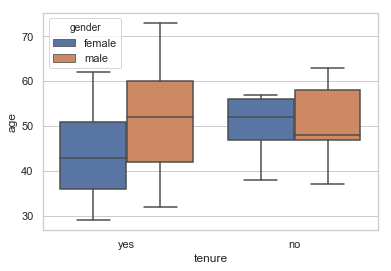

In [118]:
ax=sns.boxplot(x='tenure',y='age',hue='gender',data=ratings_df)

In [119]:
ratings_df.head()

,minority,age,gender,credits,beauty,eval,division,native,tenure,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof
0,yes,36,female,more,0.289916,4.3,upper,yes,yes,24,43,1,0,1,1,0,1,1,1
1,yes,36,female,more,0.289916,3.7,upper,yes,yes,86,125,1,0,1,1,0,1,1,1
2,yes,36,female,more,0.289916,3.6,upper,yes,yes,76,125,1,0,1,1,0,1,1,1
3,yes,36,female,more,0.289916,4.4,upper,yes,yes,77,123,1,1,1,1,0,1,1,1
4,no,59,male,more,-0.737732,4.5,upper,yes,yes,17,20,2,0,0,0,0,1,1,1


In [120]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

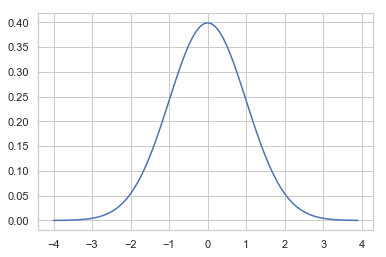

In [125]:
x_axis=np.arange(-4,+4,0.1)
plt.plot(x_axis,norm.pdf(x_axis,0,1))
plt.show()

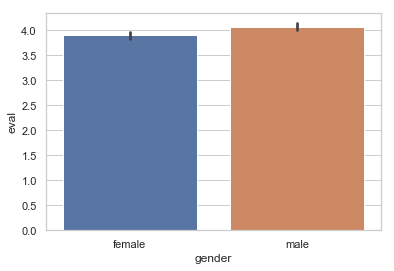

In [126]:
sns.set(style="whitegrid")
sns.barplot(x='gender',y='eval',data=ratings_df)

In [130]:
import scipy.stats

In [134]:
scipy.stats.ttest_ind(ratings_df[ratings_df['gender']=='female']['eval'],
                    ratings_df[ratings_df['gender']=='male']['eval'])

Ttest_indResult(statistic=-3.249937943510772, pvalue=0.0012387609449522217)

In [136]:
eval_mean=round(ratings_df['eval'].mean(),3)
eval_std=round(ratings_df['eval'].std(),3)
print(eval_mean,eval_std)

3.998 0.555


In [148]:
eval_mean=round(ratings_df['eval'].mean(),3)
eval_std=round(ratings_df['eval'].std(),3)
print(eval_mean,eval_std)

3.998 0.555


In [150]:
import scipy.stats

In [152]:
prob0=scipy.stats.norm.cdf((4.5-eval_mean)/eval_std)
print(prob0)

0.8171360265403258


In [153]:
print(1-prob0)

0.1828639734596742


Introdcution to Probability Lab exercise

In [155]:
ratings_url='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/teachingratings.csv'
ratings_df=pd.read_csv(ratings_url)

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from math import sqrt

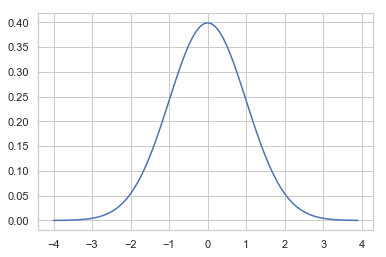

In [158]:
x_axis=np.arange(-4,4,0.1)
plt.plot(x_axis,norm.pdf(x_axis,0,1))
plt.show()

#### Probability of receiving an evaluvation score of greater than 4.5

In [167]:
eval_mean=round(ratings_df['eval'].mean(),3)
eval_std=round(ratings_df['eval'].std(),3)
print(eval_mean,eval_std)


3.998 0.555


In [251]:
prob0=scipy.stats.norm.cdf((4.5-eval_mean)/eval_std)
print (prob0)
1-prob0

0.8171360265403258


0.1828639734596742

#### Probability of getting an evaluvation score greater than 3.5 but less than 4.2

In [171]:
prob0=scipy.stats.norm.cdf((3.5-eval_mean)/eval_std)
print(prob0)

0.1847801491443654


In [172]:
prob1=scipy.stats.norm.cdf((4.2-eval_mean)/eval_std)
print(prob1)

0.642057540461896


In [174]:
round((prob1-prob0)*100,1)

45.7

#####  Using the two-tailed test from a normal distribution:

-   A professional  basketball  team wants to compare its performance with  that of players  in a regional league.
-   The pros are known to have a historic mean of 12 points  per game with  a standard  deviation  of 5.5. 
-   A group  of 36 regional players recorded on average 10.7 points  per game.
-   The pro coach would like to know whether  his professional  team scores on average are different from that of the regional players.

Here,mean=12, Population s.d=5.5,n=36,Since two tailed test we have to multiply by two
x denotes avaerage score by proffesional team
M1 denotes avaerage score by regional players

$H_0$:$x = µ_1$ (Null hypothesis)

$H_a$:$x ≠ µ_1$ (Alternative hypothesis)



In [186]:
2*round(scipy.stats.norm.cdf((10.7-12)/(5.5/sqrt(36))),3)
        

0.156

**Conclusion:** Because the p-value is greater than 0.05, we fail  to reject the null hypothesis as there is no sufficient evidence to prove that the mean point of the regional players is different from the historic mean

#### Question 1: what is the probability of receiving an evaluation score greater than 3.3?

In [209]:
prob0=scipy.stats.norm.cdf((3.3-eval_mean)/eval_std)
print(1-prob0)


0.8957422041794154


#### what is the probability of receiving an evaluation score between 2 and 3?

In [202]:
prob1=scipy.stats.norm.cdf((2-eval_mean)/eval_std)
print(prob1)

0.00015910859015753364


In [203]:
prob2=scipy.stats.norm.cdf((3-eval_mean)/eval_std)
print(prob2)

0.03607280250262359


In [206]:
print(round(prob2-prob1)*100,1)

0.0 1


#### Question 3: To test the hypothesis that sleeping for at least 8 hours makes one smarter, 12 people who have slept for at least 8 hours every day  for the past one year  have their IQ tested.
-   Here are the results: 116, 111, 101, 120, 99, 94, 106, 115, 107, 101, 110, 92
-   Test using the following hypotheses: H0: μ = 100 or Ha: μ > 100 

In [211]:
iq_mean=np.mean([116, 111, 101, 120, 99, 94, 106, 115, 107, 101, 110, 92])
iq_std=np.std([116, 111, 101, 120, 99, 94, 106, 115, 107, 101, 110, 92])
print(iq_mean,iq_std)

106.0 8.455767262643882


In [215]:
prob0=round(1-scipy.stats.norm.cdf((iq_mean - 100)/(iq_std/sqrt(12))), 3)
print (prob0)

0.007


###  Levene test and t test:-

In [256]:
scipy.stats.levene(ratings_df[ratings_df['gender']=='female']['eval'],
                  ratings_df[ratings_df['gender']=='male']['eval'],center='mean')

LeveneResult(statistic=0.1903292243529225, pvalue=0.6628469836244741)

##### Levene test is done inorder to see whether variances are equal/unequal.
Since here p value is greater than 0.05,we fail to reject null hypothesis and conclude that variances are equal

In [257]:
scipy.stats.ttest_ind(ratings_df[ratings_df['gender']=='female']['eval'],
                     ratings_df[ratings_df['gender']=='male']['eval'],equal_var=True)

Ttest_indResult(statistic=-3.249937943510772, pvalue=0.0012387609449522217)

As per t test,since our p value is less than 0.05 we reject null hypothesis and states that there is no statistic evidence to prove that the average scored by females is same as average scored by male

#### ANOVA:-
##### Does beauty score of instructors differ by age?

In [308]:
forty_lower=ratings_df.loc[(ratings_df['age']<40),'age_group']='40 years and younger'
forty_fiftyseven=ratings_df.loc[(ratings_df['age']>40) & (ratings_df['age']<57),'age_group']='between 40 and 57 years'
fiftyseven_older=ratings_df.loc[(ratings_df['age']>57),'age_group']='57 years and older'

$H_0$: Mean of all the groups (samples) are same

$H_a$: Atleast one of the sample's mean differ

In [307]:
scipy.stats.levene(ratings_df[ratings_df['age_group']=='40 years and younger']['beauty'],
                   ratings_df[ratings_df['age_group']=='between 40 and 57 years']['beauty'],
                   ratings_df[ratings_df['age_group']=='57 years and older']['beauty'])


LeveneResult(statistic=5.755344013236827, pvalue=0.0034183163722679255)

In [305]:
forty_lower=ratings_df[ratings_df['age_group']=='40 years and younger']['beauty']
forty_fiftyseven=ratings_df[ratings_df['age_group']=='between 40 and 57 years']['beauty']
fiftyseven_older=ratings_df[ratings_df['age_group']=='57 years and older']['beauty']

In [306]:
f_statistic,p_value=scipy.stats.f_oneway(forty_lower,forty_fiftyseven,fiftyseven_older)
print("F_Statistic:{0},P_value:{1}".format(f_statistic,p_value))

F_Statistic:19.490392218416748,P_value:7.983856370894076e-09


In [11]:
cont_table=pd.crosstab((ratings_df['tenure']),(ratings_df['gender']))

In [12]:
cont_table

gender,female,male
tenure,,
no,50,52
yes,145,216


In [13]:
scipy.stats.chi2_contingency(cont_table,correction=False)

(2.557051129789522,
 0.10980322511302845,
 1,
 array([[ 42.95896328,  59.04103672],
        [152.04103672, 208.95896328]]))

In [16]:
cont_table=pd.crosstab((ratings_df['tenure']),(ratings_df['gender']))

In [17]:
cont_table

gender,female,male
tenure,,
no,50,52
yes,145,216


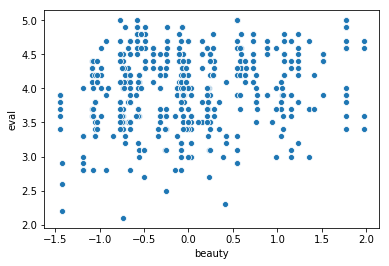

In [18]:
sns.scatterplot(x='beauty',y='eval',data=ratings_df)

In [20]:
scipy.stats.pearsonr(ratings_df['beauty'],ratings_df['eval'])

(0.1890390908404521, 4.247115419813625e-05)

#####T-Test: Using the teachers' rating data set, does gender affect teaching evaluation rates?

$H_0$:$x = µ_1$ (There is no significant difference in the evaluvation scores for male and female)

$H_a$:$x ≠ µ_1$ ((There is significant differences in the evaluvation scores for male and females)

First step, plot a histogram on dependent variable(evaluation scores)

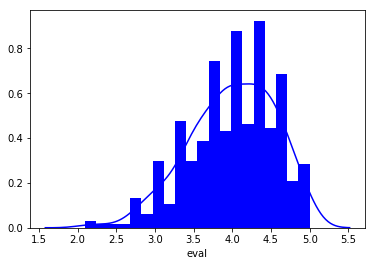

In [26]:
sns.distplot(ratings_df['eval'],bins=20,kde=True,color='blue',hist_kws={"linewidth":12, "alpha":1})

In [27]:
scipy.stats.levene(ratings_df[ratings_df['gender']=='female']['eval'],
                   ratings_df[ratings_df['gender']=='male']['eval'],center='mean')

LeveneResult(statistic=0.1903292243529225, pvalue=0.6628469836244741)

In [28]:
scipy.stats.ttest_ind(ratings_df[ratings_df['gender']=='female']['eval'],
                     ratings_df[ratings_df['gender']=='male']['eval'],equal_var=True)

Ttest_indResult(statistic=-3.249937943510772, pvalue=0.0012387609449522217)

**Conclusion:** Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in teaching evaluations based on gender

##### ANOVA: Using the teachers' rating data set, does beauty  score for instructors  differ by age?

In [44]:
forty_lower=ratings_df.loc[(ratings_df['age']<=40),'age_group']='40 years and younger'
fory_fiftyseven=ratings_df.loc[(ratings_df['age']>40) & (ratings_df['age']<57),'age_group']='between 40 and 57 years'
fiftyseven_older=ratings_df.loc[(ratings_df['age']>=57),'age_group']='57 years and older'

In [45]:
scipy.stats.levene(ratings_df[ratings_df['age_group']=='40 years and younger']['beauty'],
                  ratings_df[ratings_df['age_group']=='between 40 and 57 years']['beauty'],
                  ratings_df[ratings_df['age_group']=='57 years and older']['beauty'],center='mean')

LeveneResult(statistic=8.60005668392585, pvalue=0.0002153661809934714)

In [46]:
forty_lower=(ratings_df[ratings_df['age_group']=='40 years and younger']['beauty'])
forty_fiftyseven=(ratings_df[ratings_df['age_group']=='between 40 and 57 years']['beauty'])
fiftyseven_older=(ratings_df[ratings_df['age_group']=='57 years and older']['beauty'])
                      

In [47]:
f_statistic,p_value=scipy.stats.f_oneway(forty_lower,forty_fiftyseven,fiftyseven_older)
print("F_statistic :{0},P_value:{1} ".format (f_statistic,p_value))

F_statistic :17.597558611010122,P_value:4.3225489816137975e-08 


**Conclusion:** Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ.

##### Chi-square: Using the teachers' rating data set, is there an association between tenure and gender?

State the hypothesis:

-   $H_0:$ The proportion of teachers who are tenured is independent of gender
-   $H_1:$ The proportion of teachers who are tenured is associated with gender

In [48]:
cont_table=pd.crosstab(ratings_df['tenure'],ratings_df['gender'])
cont_table

gender,female,male
tenure,,
no,50,52
yes,145,216


In [50]:
scipy.stats.chi2_contingency(cont_table,correction=True)

(2.20678166999886, 0.1374050603563787, 1, array([[ 42.95896328,  59.04103672],
        [152.04103672, 208.95896328]]))

**Conclusion:** Since the p-value is greater than 0.05, we fail to reject the null hypothesis. As there is no sufficient evidence that teachers are tenured as a result of gender.

##### Correlation: Using the teachers rating dataset, Is teaching  evaluation  score correlated with  beauty score?
State the hypothesis:

-   $H_0:$ Teaching evaluation score is not correlated with beauty score
-   $H_1:$ Teaching evaluation score is correlated with beauty score


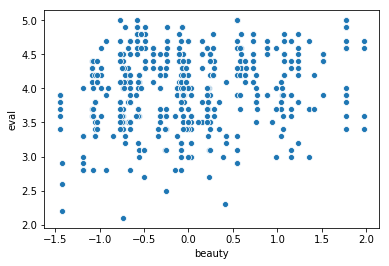

In [51]:
sns.scatterplot(x='beauty',y='eval',data=ratings_df)

In [104]:
scipy.stats.pearsonr(ratings_df['beauty'],ratings_df['eval'])

(0.1890390908404521, 4.247115419813625e-05)

**Conclusion:** Since the p-value  (Sig. (2-tailed)  < 0.05, we reject  the Null hypothesis and conclude that there  exists a relationship between  beauty and teaching evaluation score.

In [62]:
a=np.array([9, 11, 10,11,10,12, 9,11,12, 9, 10])
b=np.array([10, 13, 10, 13, 12, 9, 11, 12, 12, 12, 13])

In [63]:
scipy.stats.ttest_ind(a,b,equal_var=True)

Ttest_indResult(statistic=-2.2164816032790386, pvalue=0.03841461541539729)

In [64]:
ratings_df.head()

,minority,age,gender,credits,beauty,eval,division,native,tenure,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof,age_group
0,yes,36,female,more,0.289916,4.3,upper,yes,yes,24,43,1,0,1,1,0,1,1,1,40 years and younger
1,yes,36,female,more,0.289916,3.7,upper,yes,yes,86,125,1,0,1,1,0,1,1,1,40 years and younger
2,yes,36,female,more,0.289916,3.6,upper,yes,yes,76,125,1,0,1,1,0,1,1,1,40 years and younger
3,yes,36,female,more,0.289916,4.4,upper,yes,yes,77,123,1,1,1,1,0,1,1,1,40 years and younger
4,no,59,male,more,-0.737732,4.5,upper,yes,yes,17,20,2,0,0,0,0,1,1,1,57 years and older


####Regression in place of t test:-

In [67]:
import statsmodels.api as sm

In [68]:
x=ratings_df['female']
y=ratings_df['eval']
x=sm.add_constant(x)

In [70]:
model=sm.OLS(y,x).fit()


In [74]:
predictions=model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   eval   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     10.56
Date:                Sat, 23 Jan 2021   Prob (F-statistic):            0.00124
Time:                        16:37:27   Log-Likelihood:                -378.50
No. Observations:                 463   AIC:                             761.0
Df Residuals:                     461   BIC:                             769.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0690      0.034    121.288      0.000       4.003       4.135
female        -0.1680      0.052     -3.250      0.001      -0.270      -0.066
==============================================================================
Omnibus:                       17.625   Durbin-Watson:                   1.209
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.970
Skew:                          -0.496   Prob(JB):                     7.60e-05
Kurtosis:                       2.981   Cond. No.                         2.47
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

####Regression in place of ANOVA

In [80]:
import statsmodels.api as sm
from statsmodels.formula.api import OLS

In [86]:
ratings_url='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/teachingratings.csv'
ratings_df=pd.read_csv(ratings_url)

In [87]:
forty_lower=ratings_df.loc[(ratings_df['age']<=40),'age_group']='40 years and younger'
fory_fiftyseven=ratings_df.loc[(ratings_df['age']>40) & (ratings_df['age']<57),'age_group']='between 40 and 57 years'
fiftyseven_older=ratings_df.loc[(ratings_df['age']>=57),'age_group']='57 years and older'

In [88]:
Im=OLS('beauty ~ age_group',data=ratings_df).fit()
table=sm.stats.anova_Im(Im)
print(table)

ValueError: unrecognized data structures: <class 'str'> / <class 'NoneType'>

In [89]:
x=pd.get_dummies(ratings_df[['age_group']])

In [91]:
y=ratings_df['beauty']
x=sm.add_constant(x)

In [92]:
model=sm.OLS(y,x).fit()
predictions=model.predict(x)
model.summary

<bound method RegressionResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x000001D0DCB60C50>>

In [93]:
x=ratings_df['beauty']
y=ratings_df['eval']
x=sm.add_constant(x)
model=sm.OLS(y,x).fit()
predictions=model.predict(x)
model.summary

<bound method RegressionResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x000001D0DD0B3860>>

In [97]:
x=pd.get_dummies(ratings_df[['age_group']])
y=ratings_df['beauty']
x=sm.add_constant(x)
model=sm.OLS(y,x).fit()
predictions=model.predict(x)
model.summary

<bound method RegressionResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x000001D0DD0B3A58>>

In [98]:
ratings_url='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/teachingratings.csv'
ratings_df=pd.read_csv(ratings_url)

In [99]:
ratings_df.loc[(ratings_df['age'] <= 40), 'age_group'] = '40 years and younger'
ratings_df.loc[(ratings_df['age'] > 40)&(ratings_df['age'] < 57), 'age_group'] = 'between 40 and 57 years'
ratings_df.loc[(ratings_df['age'] >= 57), 'age_group'] = '57 years and older'

In [101]:
from statsmodels.formula.api import ols
lm = ols('beauty ~ age_group', data = ratings_df).fit()
table= sm.stats.anova_lm(lm)
print(table)

              df      sum_sq    mean_sq          F        PR(>F)
age_group    2.0   20.422744  10.211372  17.597559  4.322549e-08
Residual   460.0  266.925153   0.580272        NaN           NaN


In [102]:
ratings_df.head()

,minority,age,gender,credits,beauty,eval,division,native,tenure,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof,age_group
0,yes,36,female,more,0.289916,4.3,upper,yes,yes,24,43,1,0,1,1,0,1,1,1,40 years and younger
1,yes,36,female,more,0.289916,3.7,upper,yes,yes,86,125,1,0,1,1,0,1,1,1,40 years and younger
2,yes,36,female,more,0.289916,3.6,upper,yes,yes,76,125,1,0,1,1,0,1,1,1,40 years and younger
3,yes,36,female,more,0.289916,4.4,upper,yes,yes,77,123,1,1,1,1,0,1,1,1,40 years and younger
4,no,59,male,more,-0.737732,4.5,upper,yes,yes,17,20,2,0,0,0,0,1,1,1,57 years and older
